In [22]:
pip install wordcloud


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, init
import plotly.express as px
import mlflow
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud





nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
mlflow.set_experiment("Sentiment Analysis Experiment")
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to C:\Users\Mohamed
[nltk_data]     Adel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Mohamed
[nltk_data]     Adel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mohamed
[nltk_data]     Adel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## load data

In [24]:
df = pd.read_csv("sentimentdataset.csv")

# exploration

In [25]:
df.head(731)


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,731,Achieving a personal best in a track and field...,Happy,2016-09-14 12:30:00,TrackFieldSuccessHighSchool,Twitter,#AthleticAchievement #HighSchoolSports,26.0,51.0,Canada,2016,9,14,12
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17


In [26]:
df.shape

(732, 15)

In [27]:
df.info

<bound method DataFrame.info of      Unnamed: 0.1  Unnamed: 0  \
0               0           0   
1               1           1   
2               2           2   
3               3           3   
4               4           4   
..            ...         ...   
727           728         732   
728           729         733   
729           730         734   
730           731         735   
731           732         736   

                                                  Text    Sentiment  \
0     Enjoying a beautiful day at the park!        ...   Positive     
1     Traffic was terrible this morning.           ...   Negative     
2     Just finished an amazing workout! 💪          ...   Positive     
3     Excited about the upcoming weekend getaway!  ...   Positive     
4     Trying out a new recipe for dinner tonight.  ...   Neutral      
..                                                 ...          ...   
727  Collaborating on a science project that receiv...       Happy    
728

In [28]:
def null_count():
    return pd.DataFrame({
        'features': df.columns,
        'dtypes': df.dtypes.values,
        'NaN count': df.isnull().sum().values,
        'NaN percentage': df.isnull().sum().values / df.shape[0]
    })

null_count()


,features,dtypes,NaN count,NaN percentage
0,Unnamed: 0.1,int64,0,0.0
1,Unnamed: 0,int64,0,0.0
2,Text,object,0,0.0
3,Sentiment,object,0,0.0
4,Timestamp,object,0,0.0
5,User,object,0,0.0
6,Platform,object,0,0.0
7,Hashtags,object,0,0.0
8,Retweets,float64,0,0.0
9,Likes,float64,0,0.0


In [29]:
df.duplicated().sum()


np.int64(0)

In [30]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [31]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")


Unnamed: 0.1: 732 distinct values
Unnamed: 0: 732 distinct values
Text: 707 distinct values
Sentiment: 279 distinct values
Timestamp: 683 distinct values
User: 685 distinct values
Platform: 4 distinct values
Hashtags: 697 distinct values
Retweets: 26 distinct values
Likes: 38 distinct values
Country: 115 distinct values
Year: 14 distinct values
Month: 12 distinct values
Day: 31 distinct values
Hour: 22 distinct values


In [32]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [33]:
df['Platform'].value_counts()




Platform
Instagram     258
Facebook      231
Twitter       128
Twitter       115
Name: count, dtype: int64

In [34]:
df['Country'].value_counts()


Country
USA           59
USA           55
UK            49
Canada        44
Australia     41
              ..
Ireland        1
Scotland       1
Kenya          1
Jamaica        1
Thailand       1
Name: count, Length: 115, dtype: int64

# Data Preprocessing

## Drop Columns


In [35]:

df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Hashtags','Day', 'Hour','Sentiment'])
df

,Text,Timestamp,User,Platform,Retweets,Likes,Country,Year,Month
0,Enjoying a beautiful day at the park! ...,2023-01-15 12:30:00,User123,Twitter,15.0,30.0,USA,2023,1
1,Traffic was terrible this morning. ...,2023-01-15 08:45:00,CommuterX,Twitter,5.0,10.0,Canada,2023,1
2,Just finished an amazing workout! 💪 ...,2023-01-15 15:45:00,FitnessFan,Instagram,20.0,40.0,USA,2023,1
3,Excited about the upcoming weekend getaway! ...,2023-01-15 18:20:00,AdventureX,Facebook,8.0,15.0,UK,2023,1
4,Trying out a new recipe for dinner tonight. ...,2023-01-15 19:55:00,ChefCook,Instagram,12.0,25.0,Australia,2023,1
...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,20.0,39.0,UK,2017,8
728,Attending a surprise birthday party organized ...,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,25.0,48.0,USA,2018,6
729,Successfully fundraising for a school charity ...,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,22.0,42.0,Canada,2019,4
730,"Participating in a multicultural festival, cel...",2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,21.0,43.0,UK,2020,2


## strip_Platform


In [36]:
df['Platform'] = df['Platform'].str.strip()
df['Platform'] 


0        Twitter
1        Twitter
2      Instagram
3       Facebook
4      Instagram
         ...    
727     Facebook
728    Instagram
729      Twitter
730     Facebook
731    Instagram
Name: Platform, Length: 732, dtype: object

## Strip_Country


In [37]:

df['Country'] = df['Country'].str.strip()


In [38]:
df['Country']

0            USA
1         Canada
2            USA
3             UK
4      Australia
         ...    
727           UK
728          USA
729       Canada
730           UK
731          USA
Name: Country, Length: 732, dtype: object

## Feature Enginering


### convert date to day

In [39]:
# Timestamp

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Day_of_Week'] = df['Timestamp'].dt.day_name()
df


,Text,Timestamp,User,Platform,Retweets,Likes,Country,Year,Month,Day_of_Week
0,Enjoying a beautiful day at the park! ...,2023-01-15 12:30:00,User123,Twitter,15.0,30.0,USA,2023,1,Sunday
1,Traffic was terrible this morning. ...,2023-01-15 08:45:00,CommuterX,Twitter,5.0,10.0,Canada,2023,1,Sunday
2,Just finished an amazing workout! 💪 ...,2023-01-15 15:45:00,FitnessFan,Instagram,20.0,40.0,USA,2023,1,Sunday
3,Excited about the upcoming weekend getaway! ...,2023-01-15 18:20:00,AdventureX,Facebook,8.0,15.0,UK,2023,1,Sunday
4,Trying out a new recipe for dinner tonight. ...,2023-01-15 19:55:00,ChefCook,Instagram,12.0,25.0,Australia,2023,1,Sunday
...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,20.0,39.0,UK,2017,8,Friday
728,Attending a surprise birthday party organized ...,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,25.0,48.0,USA,2018,6,Friday
729,Successfully fundraising for a school charity ...,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,22.0,42.0,Canada,2019,4,Friday
730,"Participating in a multicultural festival, cel...",2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,21.0,43.0,UK,2020,2,Saturday


### convert month(num) to month(text)

In [40]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df['Month'] = df['Month'].map(month_mapping)
df['Month'] = df['Month'].astype('object')
df


,Text,Timestamp,User,Platform,Retweets,Likes,Country,Year,Month,Day_of_Week
0,Enjoying a beautiful day at the park! ...,2023-01-15 12:30:00,User123,Twitter,15.0,30.0,USA,2023,January,Sunday
1,Traffic was terrible this morning. ...,2023-01-15 08:45:00,CommuterX,Twitter,5.0,10.0,Canada,2023,January,Sunday
2,Just finished an amazing workout! 💪 ...,2023-01-15 15:45:00,FitnessFan,Instagram,20.0,40.0,USA,2023,January,Sunday
3,Excited about the upcoming weekend getaway! ...,2023-01-15 18:20:00,AdventureX,Facebook,8.0,15.0,UK,2023,January,Sunday
4,Trying out a new recipe for dinner tonight. ...,2023-01-15 19:55:00,ChefCook,Instagram,12.0,25.0,Australia,2023,January,Sunday
...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,20.0,39.0,UK,2017,August,Friday
728,Attending a surprise birthday party organized ...,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,25.0,48.0,USA,2018,June,Friday
729,Successfully fundraising for a school charity ...,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,22.0,42.0,Canada,2019,April,Friday
730,"Participating in a multicultural festival, cel...",2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,21.0,43.0,UK,2020,February,Saturday


### cleaned_text

In [41]:
# Text
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]
   
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text


In [43]:
import pandas as pd
import nltk

# Ensure NLTK data is downloaded
nltk.download('punkt')  # Download punkt tokenizer

# Load the dataset
df = df

# Define your cleaning function
def clean(text):
    # Your cleaning logic here
    return text  # Modify this according to your cleaning requirements

# Apply the cleaning function
df["Clean_Text"] = df["Text"].apply(clean)

# Display the DataFrame
print(df)

df["Clean_Text"] = df["Text"].apply(clean)
df

                                                  Text           Timestamp  \
0     Enjoying a beautiful day at the park!        ... 2023-01-15 12:30:00   
1     Traffic was terrible this morning.           ... 2023-01-15 08:45:00   
2     Just finished an amazing workout! 💪          ... 2023-01-15 15:45:00   
3     Excited about the upcoming weekend getaway!  ... 2023-01-15 18:20:00   
4     Trying out a new recipe for dinner tonight.  ... 2023-01-15 19:55:00   
..                                                 ...                 ...   
727  Collaborating on a science project that receiv... 2017-08-18 18:20:00   
728  Attending a surprise birthday party organized ... 2018-06-22 14:15:00   
729  Successfully fundraising for a school charity ... 2019-04-05 17:30:00   
730  Participating in a multicultural festival, cel... 2020-02-29 20:45:00   
731  Organizing a virtual talent show during challe... 2020-11-15 15:15:00   

                                      User   Platform  Retweets

[nltk_data] Downloading package punkt to C:\Users\Mohamed
[nltk_data]     Adel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Text,Timestamp,User,Platform,Retweets,Likes,Country,Year,Month,Day_of_Week,Clean_Text
0,Enjoying a beautiful day at the park! ...,2023-01-15 12:30:00,User123,Twitter,15.0,30.0,USA,2023,January,Sunday,Enjoying a beautiful day at the park! ...
1,Traffic was terrible this morning. ...,2023-01-15 08:45:00,CommuterX,Twitter,5.0,10.0,Canada,2023,January,Sunday,Traffic was terrible this morning. ...
2,Just finished an amazing workout! 💪 ...,2023-01-15 15:45:00,FitnessFan,Instagram,20.0,40.0,USA,2023,January,Sunday,Just finished an amazing workout! 💪 ...
3,Excited about the upcoming weekend getaway! ...,2023-01-15 18:20:00,AdventureX,Facebook,8.0,15.0,UK,2023,January,Sunday,Excited about the upcoming weekend getaway! ...
4,Trying out a new recipe for dinner tonight. ...,2023-01-15 19:55:00,ChefCook,Instagram,12.0,25.0,Australia,2023,January,Sunday,Trying out a new recipe for dinner tonight. ...
...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,20.0,39.0,UK,2017,August,Friday,Collaborating on a science project that receiv...
728,Attending a surprise birthday party organized ...,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,25.0,48.0,USA,2018,June,Friday,Attending a surprise birthday party organized ...
729,Successfully fundraising for a school charity ...,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,22.0,42.0,Canada,2019,April,Friday,Successfully fundraising for a school charity ...
730,"Participating in a multicultural festival, cel...",2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,21.0,43.0,UK,2020,February,Saturday,"Participating in a multicultural festival, cel..."


# visualization

## Unique Columns


In [44]:
# Unique Columns

specified_columns = ['Platform', 'Country', 'Year', 'Month', 'Day_of_Week']

for col in specified_columns:
    total_unique_values = df[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = df[col].value_counts()

    for value, count in top_values.items():
        print(f'{value}: {count}')

    print('\n' + '=' * 30 + '\n')


Total unique values for Platform: 3
Instagram: 258
Twitter: 243
Facebook: 231


Total unique values for Country: 33
USA: 188
UK: 143
Canada: 135
Australia: 75
India: 70
Brazil: 17
France: 16
Japan: 15
Germany: 14
Italy: 11
Spain: 6
South Africa: 6
Greece: 5
Netherlands: 4
Switzerland: 3
Sweden: 2
Portugal: 2
Austria: 2
Belgium: 2
Denmark: 2
Czech Republic: 2
Jordan: 1
Peru: 1
Maldives: 1
China: 1
Cambodia: 1
Norway: 1
Colombia: 1
Ireland: 1
Jamaica: 1
Kenya: 1
Scotland: 1
Thailand: 1


Total unique values for Year: 14
2023: 289
2019: 73
2020: 69
2021: 63
2022: 63
2018: 56
2017: 43
2016: 38
2015: 19
2011: 4
2013: 4
2012: 4
2014: 4
2010: 3


Total unique values for Month: 12
February: 85
January: 82
August: 78
September: 77
June: 71
July: 62
April: 51
November: 49
October: 48
May: 46
March: 44
December: 39


Total unique values for Day_of_Week: 7
Sunday: 119
Saturday: 115
Tuesday: 110
Friday: 108
Monday: 97
Thursday: 95
Wednesday: 88




In [45]:
df1 = df.copy()


In [46]:
# This code performs sentiment analysis using VADER. It calculates a compound sentiment score for each cleaned text, 
# classifying it as "positive" (≥ 0.05), "negative" (≤ -0.05), or "neutral" (otherwise).

analyzer = SentimentIntensityAnalyzer()

df1['Vader_Score'] = df1['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df1['Sentiment'] = df1['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df1[['Clean_Text', 'Vader_Score', 'Sentiment']].head(20))


                                           Clean_Text  Vader_Score Sentiment
0    Enjoying a beautiful day at the park!        ...       0.8221  positive
1    Traffic was terrible this morning.           ...      -0.4767  negative
2    Just finished an amazing workout! 💪          ...       0.6239  positive
3    Excited about the upcoming weekend getaway!  ...       0.4003  positive
4    Trying out a new recipe for dinner tonight.  ...       0.0000   neutral
5    Feeling grateful for the little things in lif...       0.5423  positive
6    Rainy days call for cozy blankets and hot coc...      -0.0772  negative
7    The new movie release is a must-watch!       ...       0.0000   neutral
8    Political discussions heating up on the timel...       0.0000   neutral
9    Missing summer vibes and beach days.         ...      -0.2960  negative
10   Just published a new blog post. Check it out!...       0.0000   neutral
11   Feeling a bit under the weather today.       ...       0.1280  positive

## Pie Chart

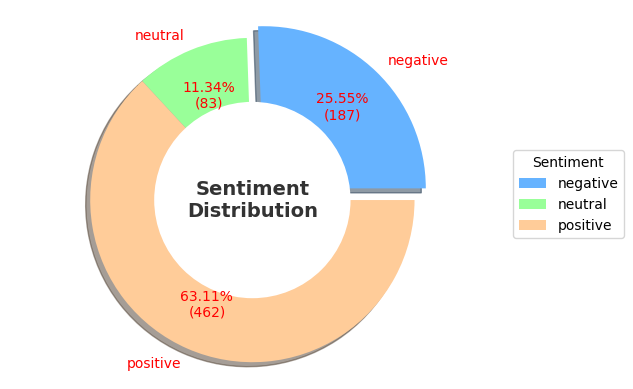

In [47]:
colors = ['#66b3ff', '#99ff99', '#ffcc99']

explode = (0.1, 0, 0)  

sentiment_counts = df1.groupby("Sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="r"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()


## Bar Plot(year)

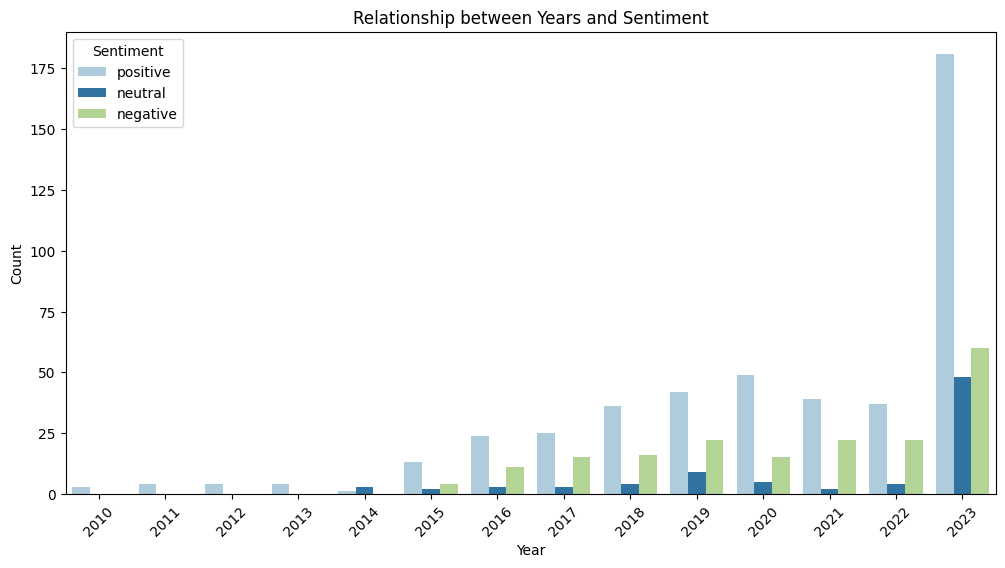

In [48]:
# Year

plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Bar Plot(month)

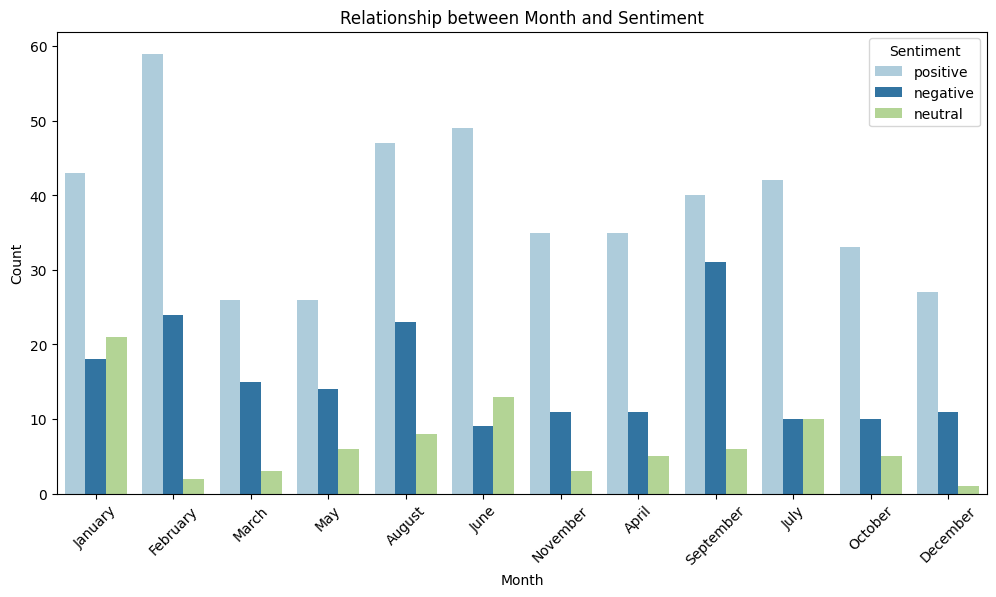

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Month and Sentiment')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Bar Plot(day)

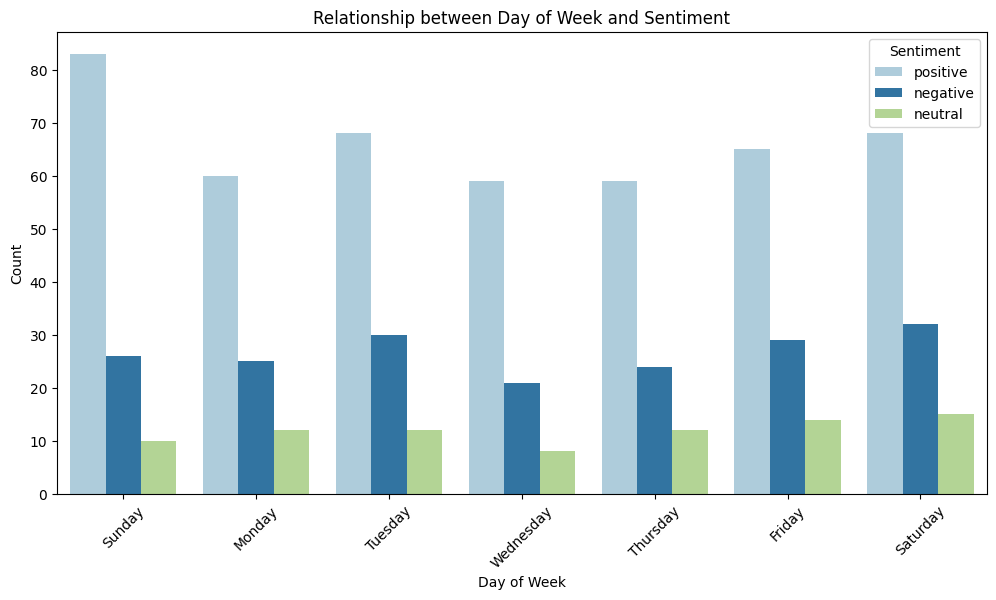

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Day of Week and Sentiment')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Bar Plot(platform)

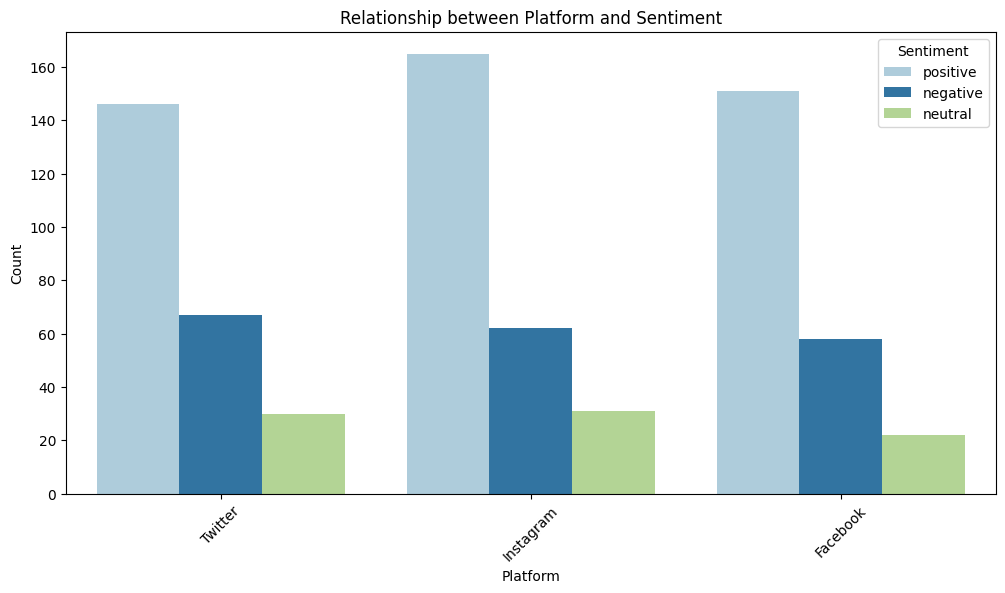

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Platform and Sentiment')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Bar Plot(country)

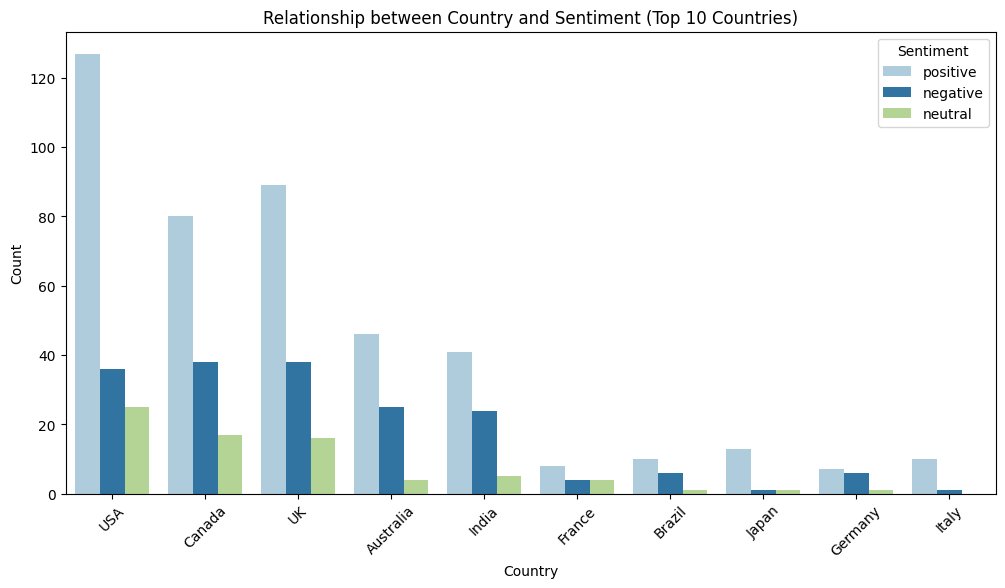

In [52]:
plt.figure(figsize=(12, 6))

top_10_countries = df1['Country'].value_counts().head(10).index

df_top_10_countries = df1[df1['Country'].isin(top_10_countries)]

sns.countplot(x='Country', hue='Sentiment', data=df_top_10_countries, palette='Paired')
plt.title('Relationship between Country and Sentiment (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Common Words(viz)



In [53]:
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,808
1,of,623
2,a,621
3,in,259
4,to,133
5,and,111
6,with,107
7,for,99
8,on,91
9,by,69


In [57]:
Positive_sent = df1[df1['Sentiment'] == 'positive']
Negative_sent = df1[df1['Sentiment'] == 'negative']
Neutral_sent = df1[df1['Sentiment'] == 'neutral']


## Positive Common Words(viz)



In [58]:
top = Counter([item for sublist in df1[df1['Sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Greens')


,Common_words,count
0,the,516
1,a,414
2,of,406
3,in,165
4,and,85
5,with,77
6,to,77
7,for,71
8,on,61
9,by,37


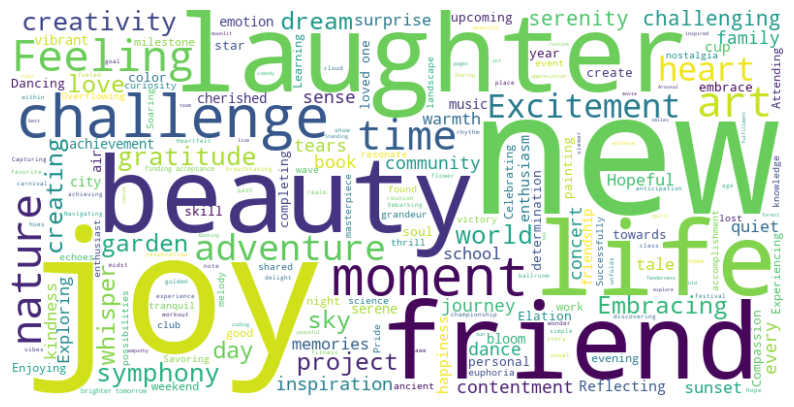

In [59]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'positive']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Neutral Common Words(viz)



In [60]:
top = Counter([item for sublist in df1[df1['Sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Blues')


,Common_words,count
0,the,76
1,a,70
2,of,41
3,to,21
4,in,17
5,and,16
6,new,14
7,on,13
8,for,12
9,by,10


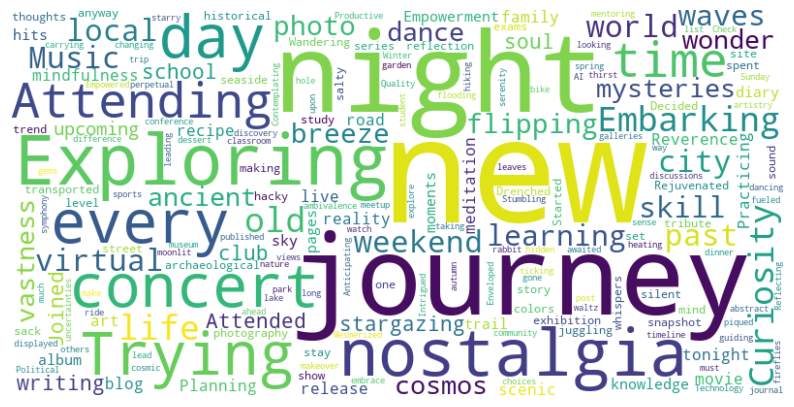

In [61]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'neutral']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Negative Common Words(viz)



In [62]:
top = Counter([item for sublist in df1[df1['Sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Reds')


,Common_words,count
0,the,216
1,of,176
2,a,137
3,in,77
4,to,35
5,with,23
6,by,22
7,my,17
8,on,17
9,for,16


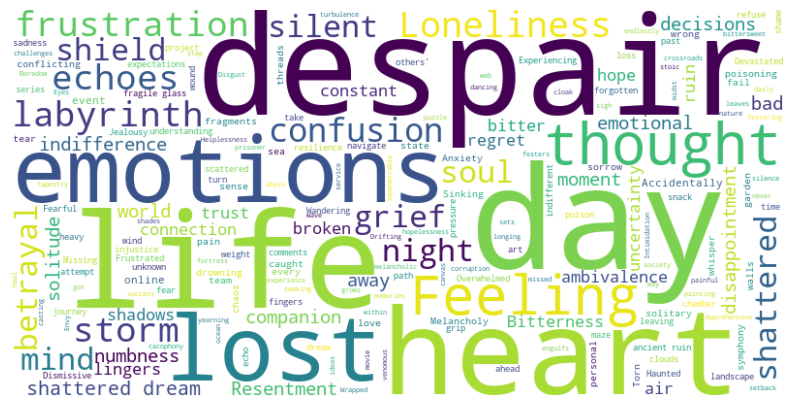

In [63]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'negative']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Data Preparation



In [64]:
df2 = df1.copy()


In [65]:
df2

,Text,Timestamp,User,Platform,Retweets,Likes,Country,Year,Month,Day_of_Week,Clean_Text,Vader_Score,Sentiment,temp_list
0,Enjoying a beautiful day at the park! ...,2023-01-15 12:30:00,User123,Twitter,15.0,30.0,USA,2023,January,Sunday,Enjoying a beautiful day at the park! ...,0.8221,positive,"[Enjoying, a, beautiful, day, at, the, park!]"
1,Traffic was terrible this morning. ...,2023-01-15 08:45:00,CommuterX,Twitter,5.0,10.0,Canada,2023,January,Sunday,Traffic was terrible this morning. ...,-0.4767,negative,"[Traffic, was, terrible, this, morning.]"
2,Just finished an amazing workout! 💪 ...,2023-01-15 15:45:00,FitnessFan,Instagram,20.0,40.0,USA,2023,January,Sunday,Just finished an amazing workout! 💪 ...,0.6239,positive,"[Just, finished, an, amazing, workout!, 💪]"
3,Excited about the upcoming weekend getaway! ...,2023-01-15 18:20:00,AdventureX,Facebook,8.0,15.0,UK,2023,January,Sunday,Excited about the upcoming weekend getaway! ...,0.4003,positive,"[Excited, about, the, upcoming, weekend, getaw..."
4,Trying out a new recipe for dinner tonight. ...,2023-01-15 19:55:00,ChefCook,Instagram,12.0,25.0,Australia,2023,January,Sunday,Trying out a new recipe for dinner tonight. ...,0.0000,neutral,"[Trying, out, a, new, recipe, for, dinner, ton..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,20.0,39.0,UK,2017,August,Friday,Collaborating on a science project that receiv...,0.8268,positive,"[Collaborating, on, a, science, project, that,..."
728,Attending a surprise birthday party organized ...,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,25.0,48.0,USA,2018,June,Friday,Attending a surprise birthday party organized ...,0.9551,positive,"[Attending, a, surprise, birthday, party, orga..."
729,Successfully fundraising for a school charity ...,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,22.0,42.0,Canada,2019,April,Friday,Successfully fundraising for a school charity ...,0.9098,positive,"[Successfully, fundraising, for, a, school, ch..."
730,"Participating in a multicultural festival, cel...",2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,21.0,43.0,UK,2020,February,Saturday,"Participating in a multicultural festival, cel...",0.8977,positive,"[Participating, in, a, multicultural, festival..."


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import joblib


## Split Data



In [67]:
X = df2['Clean_Text'].values
y = df2['Sentiment'].values


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modeling

In [69]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [70]:
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [71]:
import mlflow
def train_and_evaluate_model(model, model_name):
    with mlflow.start_run(run_name=model_name):
        mlflow.log_param("model", model_name)
        
        # Train model
        model.fit(X_train_tfidf, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test_tfidf)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        mlflow.log_metric("accuracy", accuracy)
        
        # Log classification report
        class_report = classification_report(y_test, y_pred, output_dict=True)
        mlflow.log_metrics({f'precision_{cls}': score['precision'] for cls, score in class_report.items() if isinstance(score, dict)})
        mlflow.log_metrics({f'recall_{cls}': score['recall'] for cls, score in class_report.items() if isinstance(score, dict)})
        
        print(f"{model_name} Results:")
        print(f"Accuracy: {accuracy}")
        print("Classification Report:\n", classification_report(y_test, y_pred))

## Passive Aggressive Classifier



In [72]:
pac_classifier = PassiveAggressiveClassifier(max_iter=50, random_state=42)
train_and_evaluate_model(pac_classifier, "Passive Aggressive Classifier")

Passive Aggressive Classifier Results:
Accuracy: 0.7959183673469388
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.79      0.82        39
     neutral       0.36      0.29      0.32        14
    positive       0.83      0.87      0.85        94

    accuracy                           0.80       147
   macro avg       0.68      0.65      0.66       147
weighted avg       0.79      0.80      0.79       147



In [73]:
joblib.dump(pac_classifier, 'PassiveAggressiveClassifier.pkl')


['PassiveAggressiveClassifier.pkl']

## Logistic Classifier



In [74]:
logistic_classifier = LogisticRegression(max_iter=50, random_state=42)
train_and_evaluate_model(logistic_classifier, "Logistic Regression")


Logistic Regression Results:
Accuracy: 0.7414965986394558
Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.46      0.59        39
     neutral       0.00      0.00      0.00        14
    positive       0.73      0.97      0.83        94

    accuracy                           0.74       147
   macro avg       0.52      0.48      0.47       147
weighted avg       0.68      0.74      0.69       147



## Random Fores Classifier

In [75]:
random_forest_classifier = RandomForestClassifier(random_state=42)
train_and_evaluate_model(random_forest_classifier, "Random Forest Classifier")

Random Forest Classifier Results:
Accuracy: 0.7755102040816326
Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.51      0.66        39
     neutral       0.67      0.14      0.24        14
    positive       0.75      0.98      0.85        94

    accuracy                           0.78       147
   macro avg       0.78      0.54      0.58       147
weighted avg       0.79      0.78      0.74       147



## SVM Classifier



In [76]:
svm_classifier = SVC(random_state=42)
train_and_evaluate_model(svm_classifier, "SVM Classifier")


SVM Classifier Results:
Accuracy: 0.7210884353741497
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.31      0.47        39
     neutral       0.00      0.00      0.00        14
    positive       0.70      1.00      0.82        94

    accuracy                           0.72       147
   macro avg       0.57      0.44      0.43       147
weighted avg       0.71      0.72      0.65       147

